# Titanic Survival Prediction

One of the most common and useful applications of machine learning is classification, which is the task of assigning a label to an input based on some criteria. For example, we can use classification to predict whether a passenger on the Titanic survived or not, based on their features such as age, gender, class, etc. In this task, we will use Python and scikit-learn to build a classification model for the Titanic dataset and evaluate its performance.

![titanic](titanic.webp)  

Source: https://shorturl.at/rxIJ9


### Data Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import set_config 

set_config(transform_output="pandas")

%matplotlib inline

/tmp/ipykernel_47899/834310989.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Correlation heatmap

Correlation heatmap helps us discover relationships between variable. Correlated variables will be used as features during preprocessing

<Axes: >

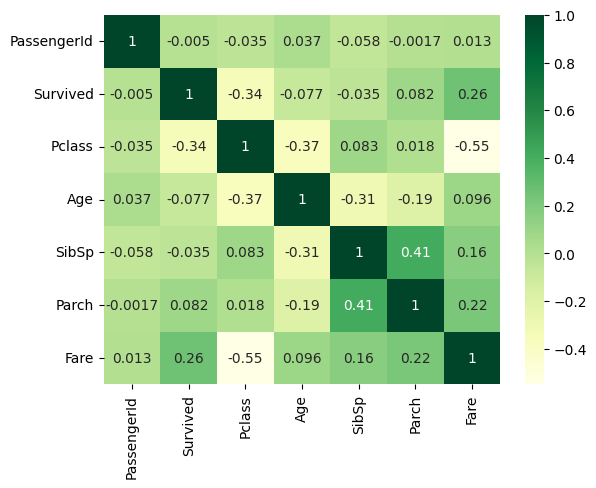

In [5]:
sns.heatmap(df.drop(['Name', 'Embarked', 'Sex', 'Ticket', 'Cabin'], axis=1).corr(), annot=True, cmap='YlGn')


In [6]:
df.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


### Data Preprocessing


In [8]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [9]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [11]:
imp = SimpleImputer()

In [12]:

ct = ColumnTransformer([
    ('imputer', imp, ['Age']),
    ('onehotencoder', ohe, ['Sex', 'Embarked'])], 
    remainder='passthrough')

In [13]:
clf = LogisticRegression(max_iter=2000)

### Data Modelling

In [14]:
pipe = Pipeline(steps=[
    ('preprocessing', ct), 
    ('model', clf)
])

In [15]:
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer', SimpleImputer(),
                                                  ['Age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('model', LogisticRegression(max_iter=2000))])

In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer', SimpleImputer(),
                                                  ['Age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('model', LogisticRegression(max_iter=2000))])

### Model Performance

In [17]:
# Testing data accuracy

score = pipe.score(X_test, y_test)
percentage = score * 100
print("%.3f" % percentage, "%")

81.006 %


In [18]:
#Training data accuracy

score = pipe.score(X_train, y_train)
percentage = score * 100
print("%.3f" % percentage, "%")

80.478 %


In [19]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



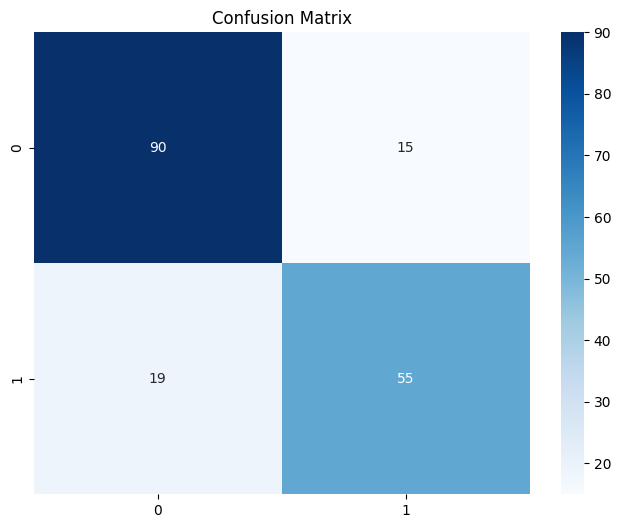

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()